# 01. Librerías y Datos

In [314]:
import pandas as pd
import folium
import plotly.express as px
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

In [288]:
df= pd.read_excel('../data/Calidad_del_Agua_Subterranea.xlsx')
df

CLAVE                       SITIO  \
0                   BROTE CARMINA 3             CARMINA 3 BROTE   
1                          CAZEPA-1         POZO SAN FERNANDO 1   
2                         CAZEPA-10            POZO EL HUARACHE   
3                         CAZEPA-11              POZO LAS AURAS   
4                          CAZEPA-2         POZO SAN FERNANDO 2   
...                             ...                         ...   
2363  TOMA DOMICILIARIA LA ESTANCIA    DOMICILIARIA LA ESTANCIA   
2364     TOMA DOMICILIARIA LA LABOR  TOMA DOMICILIARIA LA LABOR   
2365     TOMA DOMICILIARIA SAN JOSE  TOMA DOMICILIARIA SAN JOSE   
2366                    ZAPATILLA 1                 ZAPATILLA 1   
2367                    ZAPATILLA 2                 ZAPATILLA 2   

              ORGANISMO_DE_CUENCA                ESTADO  \
0                       RÍO BRAVO  COAHUILA DE ZARAGOZA   
1     CUENCAS CENTRALES DEL NORTE               DURANGO   
2     CUENCAS CENTRALES DEL NORTE               DURANGO   
3     CUENCAS CENTRALES DEL NORTE               DURANGO   
4     CUENCAS CENTRALES DEL NORTE               DURANGO   
...                           ...                   ...   
2363                     NOROESTE                SONORA   
2364                     NOROESTE                SONORA   
2365                     NOROESTE                SONORA   
2366  CUENCAS CENTRALES DEL NORTE       SAN LUIS POTOSÍ   
2367  CUENCAS CENTRALES DEL NORTE       SAN LUIS POTOSÍ   

                        MUNICIPIO                   ACUIFERO  \
0                          ACUÑA            PRESA LA AMISTAD   
1                           LERDO               VILLA JUAREZ   
2                           LERDO  PRINCIPAL-REGION LAGUNERA   
3                           LERDO  PRINCIPAL-REGION LAGUNERA   
4                           LERDO               VILLA JUAREZ   
...                           ...                        ...   
2363                      ACONCHI                 RIO SONORA   
2364                    BAVIACORA                 RIO SONORA   
2365                    BAVIACORA                 RIO SONORA   
2366  SOLEDAD DE GRACIANO SANCHEZ            SAN LUIS POTOSI   
2367  SOLEDAD DE GRACIANO SANCHEZ            SAN LUIS POTOSI   

                SUBTIPO    LONGITUD    LATITUD    PERIODO  ... CUMPLE_CON_DUR  \
0                 BROTE -101.075380  29.442550  2012-2022  ...             NO   
1                  POZO -103.535510  25.509710  2012-2022  ...             SI   
2                  POZO -103.498190  25.528860  2012-2022  ...             SI   
3                  POZO -103.514380  25.548890  2012-2022  ...             SI   
4                  POZO -103.539530  25.509460  2012-2022  ...             SI   
...                 ...         ...        ...        ...  ...            ...   
2363  TOMA DOMICILIARIA -110.215460  29.796990  2012-2022  ...             SI   
2364  TOMA DOMICILIARIA -110.129170  29.620330  2012-2022  ...             SI   
2365  TOMA DOMICILIARIA -110.185410  29.745850  2012-2022  ...             SI   
2366               POZO -100.837639  22.186722  2012-2022  ...             SI   
2367               POZO -100.833083  22.188722  2012-2022  ...             SI   

     CUMPLE_CON_CF  CUMPLE_CON_NO3 CUMPLE_CON_AS CUMPLE_CON_CD CUMPLE_CON_CR  \
0               SI              SI            SI            SI            SI   
1               SI              SI            SI            SI            SI   
2               SI              SI            SI            SI            SI   
3               SI              SI            SI            SI            SI   
4               SI              SI            SI            SI            SI   
...            ...             ...           ...           ...           ...   
2363            SI              SI            SI            SI            SI   
2364            SI              SI            SI            SI            SI   
2365            SI              SI            SI      

In [ ]:
gdf= gpd.read_file('../data/dest2019gw/dest2019gw.shp')
gdf

# 02. Limpieza de datos

In [289]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

In [290]:
df= df.replace('<', '', regex=True)
df['ALC_mg/L']= df['ALC_mg/L'].astype(float)
df['AS_TOT_mg/L']= df['AS_TOT_mg/L'].astype(float)
df['CD_TOT_mg/L']= df['CD_TOT_mg/L'].astype(float)
df['COLI_FEC_NMP/100_mL']= df['COLI_FEC_NMP/100_mL'].astype(float)
df['CONDUCT_mS/cm']= df['CONDUCT_mS/cm'].astype(float)
df['CR_TOT_mg/L']= df['CR_TOT_mg/L'].astype(float)
df['DUR_mg/L']= df['DUR_mg/L'].astype(float)
df['FE_TOT_mg/L']= df['FE_TOT_mg/L'].astype(float)
df['FLUORUROS_mg/L']= df['FLUORUROS_mg/L'].astype(float)
df['HG_TOT_mg/L']= df['HG_TOT_mg/L'].astype(float)
df['MN_TOT_mg/L']= df['MN_TOT_mg/L'].astype(float)
df['N_NO3_mg/L']= df['N_NO3_mg/L'].astype(float)
df['PB_TOT_mg/L']= df['PB_TOT_mg/L'].astype(float)
df['SDT_mg/L']= df['SDT_mg/L'].astype(float)

In [291]:
df['ALC_mg/L']= df['ALC_mg/L'].fillna(df['ALC_mg/L'].min())
df['AS_TOT_mg/L']= df['AS_TOT_mg/L'].fillna(df['AS_TOT_mg/L'].min())
df['CD_TOT_mg/L']= df['CD_TOT_mg/L'].fillna(df['CD_TOT_mg/L'].min())
df['COLI_FEC_NMP/100_mL']= df['COLI_FEC_NMP/100_mL'].fillna(df['COLI_FEC_NMP/100_mL'].min())
df['CONDUCT_mS/cm']= df['CONDUCT_mS/cm'].fillna(df['CONDUCT_mS/cm'].min())
df['CR_TOT_mg/L']= df['CR_TOT_mg/L'].fillna(df['CR_TOT_mg/L'].min())
df['DUR_mg/L']= df['DUR_mg/L'].fillna(df['DUR_mg/L'].min())
df['FE_TOT_mg/L']= df['FE_TOT_mg/L'].fillna(df['FE_TOT_mg/L'].min())
df['FLUORUROS_mg/L']= df['FLUORUROS_mg/L'].fillna(df['FLUORUROS_mg/L'].min())
df['HG_TOT_mg/L']= df['HG_TOT_mg/L'].fillna(df['HG_TOT_mg/L'].min())
df['MN_TOT_mg/L']= df['MN_TOT_mg/L'].fillna(df['MN_TOT_mg/L'].min())
df['N_NO3_mg/L']= df['N_NO3_mg/L'].fillna(df['N_NO3_mg/L'].min())
df['PB_TOT_mg/L']= df['PB_TOT_mg/L'].fillna(df['PB_TOT_mg/L'].min())
df['SDT_mg/L']= df['SDT_mg/L'].fillna(df['SDT_mg/L'].min())

In [292]:
df['CALIDAD_ALC']= df['CALIDAD_ALC'].replace({"Baja":1, "Media":2, "Alta":3, "Indeseable_":4, "Indeseable como FAAP":5}).astype(float)
df['CALIDAD_AS']= df['CALIDAD_AS'].replace({'Potable - Excelente':1, 'Apta como FAAP':2,'No apta como FAAP':3}).astype(float)
df['CALIDAD_CD']= df['CALIDAD_CD'].replace({'Potable - Excelente':1, 'Apta como FAAP':2,'No apta como FAAP':3}).astype(float)
df['CALIDAD_COLI_FEC']= df['CALIDAD_COLI_FEC'].replace({'Potable - Excelente':1, 'Buena calidad':2, 'Aceptable':3, 'Contaminada':4, 'Fuertemente contaminada':5}).astype(float)
df['CALIDAD_CONDUC']= df['CALIDAD_CONDUC'].replace({'Excelente para riego':1, 'Buena para riego':2, 'Permisible para riego':3, 'Dudosa para riego':4, 'Indeseable para riego':5}).astype(float)
df['CALIDAD_CR']= df['CALIDAD_CR'].replace({'Potable - Excelente':1, 'No apta como FAAP':2}).astype(float)
df['CALIDAD_DUR']= df['CALIDAD_DUR'].replace({'Potable - Suave':1, 'Potable - Moderadamente suave':2, 'Potable - Dura':3, 'Muy dura e indeseable usos industrial y domestico':4}).astype(float)
df['CALIDAD_FE']= df['CALIDAD_FE'].replace({'Potable - Excelente':1, 'Sin efectos en la salud - Puede dar color al agua':2}).astype(float)
df['CALIDAD_FLUO']= df['CALIDAD_FLUO'].replace({'Baja':1, 'Media':2, 'Potable - Optima':3, 'Alta':4}).astype(float)
df['CALIDAD_HG']= df['CALIDAD_HG'].replace({'Potable - Excelente':1, 'No apta como FAAP':2}).astype(float)
df['CALIDAD_MN']= df['CALIDAD_MN'].replace({'Potable - Excelente':1, 'Puede afectar la salud':2, 'Sin efectos en la salud - Puede dar color al agua':3}).astype(float)
df['CALIDAD_N_NO3']= df['CALIDAD_N_NO3'].replace({'Potable - Excelente':1, 'Potable - Buena calidad':2, 'No apta como FAAP':3}).astype(float)
df['CALIDAD_PB']= df['CALIDAD_PB'].replace({'Potable - Excelente':1, 'No apta como FAAP':2}).astype(float)
df['CALIDAD_SDT_ra']= df['CALIDAD_SDT_ra'].replace({'Excelente para riego':1, 'Cultivos sensibles':2, 'Cultivos con manejo especial':2, 'Cultivos tolerantes':3, 'Indeseable para riego':4}).astype(float)
df['CALIDAD_SDT_salin']= df['CALIDAD_SDT_salin'].replace({'Potable - Dulce':1, 'Ligeramente salobres':2, "Salinas":3,'Salobres':4}).astype(float)

In [293]:
df['CALIDAD_ALC']= df['CALIDAD_ALC'].fillna(df['CALIDAD_ALC'].min())
df['CALIDAD_AS']= df['CALIDAD_AS'].fillna(df['CALIDAD_AS'].min())
df['CALIDAD_CD']= df['CALIDAD_CD'].fillna(df['CALIDAD_CD'].min())
df['CALIDAD_COLI_FEC']= df['CALIDAD_COLI_FEC'].fillna(df['CALIDAD_COLI_FEC'].min())
df['CALIDAD_CONDUC']= df['CALIDAD_CONDUC'].fillna(df['CALIDAD_CONDUC'].min())
df['CALIDAD_CR']= df['CALIDAD_CR'].fillna(df['CALIDAD_CR'].min())
df['CALIDAD_DUR']= df['CALIDAD_DUR'].fillna(df['CALIDAD_DUR'].min())
df['CALIDAD_FE']= df['CALIDAD_FE'].fillna(df['CALIDAD_FE'].min())
df['CALIDAD_FLUO']= df['CALIDAD_FLUO'].fillna(df['CALIDAD_FLUO'].min())
df['CALIDAD_HG']= df['CALIDAD_HG'].fillna(df['CALIDAD_HG'].min())
df['CALIDAD_MN']= df['CALIDAD_MN'].fillna(df['CALIDAD_MN'].min())
df['CALIDAD_N_NO3']= df['CALIDAD_N_NO3'].fillna(df['CALIDAD_N_NO3'].min())
df['CALIDAD_PB']= df['CALIDAD_PB'].fillna(df['CALIDAD_PB'].min())
df['CALIDAD_SDT_ra']= df['CALIDAD_SDT_ra'].fillna(df['CALIDAD_SDT_ra'].min())
df['CALIDAD_SDT_salin']= df['CALIDAD_SDT_salin'].fillna(df['CALIDAD_SDT_salin'].min())

In [294]:
df['SEMAFORO']= df['SEMAFORO'].replace({'Verde':1, 'Amarillo':2, 'Rojo':3}).astype(float)

In [295]:
variables= ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L', 'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_mg/L']
calidades= ['CALIDAD_ALC', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_COLI_FEC', 'CALIDAD_CONDUC', 'CALIDAD_CR', 'CALIDAD_DUR', 'CALIDAD_FE', 'CALIDAD_FLUO', 'CALIDAD_HG', 'CALIDAD_MN', 'CALIDAD_N_NO3', 'CALIDAD_PB', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin']

In [296]:
df[variables].describe()

ALC_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  COLI_FEC_NMP/100_mL  \
count  2368.000000  2368.000000  2368.000000          2368.000000   
mean    225.015183     0.021912     0.003107           163.529603   
std     115.023788     0.034908     0.003337          2014.893757   
min      25.000000     0.010000     0.003000             1.100000   
25%     151.775000     0.010000     0.003000             1.100000   
50%     214.782500     0.010000     0.003000             1.100000   
75%     293.764250     0.017100     0.003000             1.100000   
max    1627.400000     0.450600     0.154125         82000.000000   

       CONDUCT_mS/cm  CR_TOT_mg/L     DUR_mg/L  FE_TOT_mg/L  FLUORUROS_mg/L  \
count    2368.000000  2368.000000  2368.000000  2368.000000     2368.000000   
mean     1078.488723     0.009026   336.491282     0.356987        0.974405   
std      1149.212394     0.062950   414.025191     3.541371        1.547647   
min        27.700000     0.005000    20.000000     0.025000        0.200000   
25%       466.000000     0.005000   108.437725     0.025000        0.274000   
50%       751.000000     0.005000   233.538400     0.048436        0.503650   
75%      1266.250000     0.005000   413.100000     0.129825        1.045746   
max     16100.000000     2.144814  9016.000000    84.360000       25.930000   

       HG_TOT_mg/L  MN_TOT_mg/L   N_NO3_mg/L  PB_TOT_mg/L      SDT_mg/L  
count  2368.000000  2368.000000  2368.000000  2368.000000   2368.000000  
mean      0.000524     0.080253     4.327283     0.006516    761.970226  
std       0.000416     0.813328     8.365222     0.006665   1060.131353  
min       0.000500     0.001500     0.020000     0.005000     25.000000  
25%       0.000500     0.001500     0.675243     0.005000    308.000000  
50%       0.000500     0.001903     2.087597     0.005000    492.000000  
75%       0.000500     0.010025     4.966212     0.005000    832.250000  
max       0.019613    37.321215   154.881700     0.088267  29981.400000

In [297]:
df[calidades].describe()

CALIDAD_ALC   CALIDAD_AS   CALIDAD_CD  CALIDAD_COLI_FEC  \
count  2368.000000  2368.000000  2368.000000       2368.000000   
mean      2.776605     1.531250     1.007601          1.322213   
std       0.767095     0.780976     0.108497          0.664493   
min       1.000000     1.000000     1.000000          1.000000   
25%       3.000000     1.000000     1.000000          1.000000   
50%       3.000000     1.000000     1.000000          1.000000   
75%       3.000000     2.000000     1.000000          1.000000   
max       5.000000     3.000000     3.000000          5.000000   

       CALIDAD_CONDUC   CALIDAD_CR  CALIDAD_DUR   CALIDAD_FE  CALIDAD_FLUO  \
count     2368.000000  2368.000000  2368.000000  2368.000000   2368.000000   
mean         2.594595     1.005912     2.776182     1.099240      2.140625   
std          0.911090     0.076679     0.877204     0.299047      1.111862   
min          1.000000     1.000000     1.000000     1.000000      1.000000   
25%          2.000000     1.000000     2.000000     1.000000      1.000000   
50%          3.000000     1.000000     3.000000     1.000000      2.000000   
75%          3.000000     1.000000     3.000000     1.000000      3.000000   
max          5.000000     2.000000     4.000000     2.000000      4.000000   

        CALIDAD_HG   CALIDAD_MN  CALIDAD_N_NO3   CALIDAD_PB  CALIDAD_SDT_ra  \
count  2368.000000  2368.000000    2368.000000  2368.000000     2368.000000   
mean      1.000422     1.107264       1.331081     1.068412        1.560389   
std       0.020550     0.400019       0.622230     0.252505        0.633311   
min       1.000000     1.000000       1.000000     1.000000        1.000000   
25%       1.000000     1.000000       1.000000     1.000000        1.000000   
50%       1.000000     1.000000       1.000000     1.000000        1.000000   
75%       1.000000     1.000000       1.000000     1.000000        2.000000   
max       2.000000     3.000000       3.000000     2.000000        4.000000   

       CALIDAD_SDT_salin  
count        2368.000000  
mean            1.320101  
std             0.765037  
min             1.000000  
25%             1.000000  
50%             1.000000  
75%             1.000000  
max             4.000000

In [298]:
df_variables_norm= df[variables].copy()
for var in variables:
    df_variables_norm[var]= (df[var]-df[var].min())/(df[var].max()-df[var].min())
df_variables_norm.describe()

ALC_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  COLI_FEC_NMP/100_mL  \
count  2368.000000  2368.000000  2368.000000          2368.000000   
mean      0.124822     0.027035     0.000709             0.001981   
std       0.071782     0.079229     0.022081             0.024572   
min       0.000000     0.000000     0.000000             0.000000   
25%       0.079116     0.000000     0.000000             0.000000   
50%       0.118436     0.000000     0.000000             0.000000   
75%       0.167726     0.016114     0.000000             0.000000   
max       1.000000     1.000000     1.000000             1.000000   

       CONDUCT_mS/cm   CR_TOT_mg/L     DUR_mg/L  FE_TOT_mg/L  FLUORUROS_mg/L  \
count    2368.000000  2.368000e+03  2368.000000  2368.000000     2368.000000   
mean        0.065379  1.881563e-03     0.035181     0.003937        0.030097   
std         0.071503  2.941822e-02     0.046023     0.041992        0.060150   
min         0.000000  0.000000e+00     0.000000     0.000000        0.000000   
25%         0.027271  4.053444e-19     0.009831     0.000000        0.002876   
50%         0.045003  4.053444e-19     0.023737     0.000278        0.011801   
75%         0.077061  4.053444e-19     0.043697     0.001243        0.032870   
max         1.000000  1.000000e+00     1.000000     1.000000        1.000000   

       HG_TOT_mg/L  MN_TOT_mg/L   N_NO3_mg/L  PB_TOT_mg/L     SDT_mg/L  
count  2368.000000  2368.000000  2368.000000  2368.000000  2368.000000  
mean      0.001266     0.002110     0.027814     0.018208     0.024601  
std       0.021747     0.021794     0.054017     0.080045     0.035389  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.004231     0.000000     0.009447  
50%       0.000000     0.000011     0.013351     0.000000     0.015589  
75%       0.000000     0.000228     0.031940     0.000000     0.026947  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [299]:
df_calidades_norm= df[calidades].copy()
for var in calidades:
    df_calidades_norm[var]= (df[var]-df[var].min())/(df[var].max()-df[var].min())
df_calidades_norm.describe()

CALIDAD_ALC   CALIDAD_AS   CALIDAD_CD  CALIDAD_COLI_FEC  \
count  2368.000000  2368.000000  2368.000000       2368.000000   
mean      0.444151     0.265625     0.003801          0.080553   
std       0.191774     0.390488     0.054248          0.166123   
min       0.000000     0.000000     0.000000          0.000000   
25%       0.500000     0.000000     0.000000          0.000000   
50%       0.500000     0.000000     0.000000          0.000000   
75%       0.500000     0.500000     0.000000          0.000000   
max       1.000000     1.000000     1.000000          1.000000   

       CALIDAD_CONDUC   CALIDAD_CR  CALIDAD_DUR   CALIDAD_FE  CALIDAD_FLUO  \
count     2368.000000  2368.000000  2368.000000  2368.000000   2368.000000   
mean         0.398649     0.005912     0.592061     0.099240      0.380208   
std          0.227772     0.076679     0.292401     0.299047      0.370621   
min          0.000000     0.000000     0.000000     0.000000      0.000000   
25%          0.250000     0.000000     0.333333     0.000000      0.000000   
50%          0.500000     0.000000     0.666667     0.000000      0.333333   
75%          0.500000     0.000000     0.666667     0.000000      0.666667   
max          1.000000     1.000000     1.000000     1.000000      1.000000   

        CALIDAD_HG   CALIDAD_MN  CALIDAD_N_NO3   CALIDAD_PB  CALIDAD_SDT_ra  \
count  2368.000000  2368.000000    2368.000000  2368.000000     2368.000000   
mean      0.000422     0.053632       0.165541     0.068412        0.186796   
std       0.020550     0.200009       0.311115     0.252505        0.211104   
min       0.000000     0.000000       0.000000     0.000000        0.000000   
25%       0.000000     0.000000       0.000000     0.000000        0.000000   
50%       0.000000     0.000000       0.000000     0.000000        0.000000   
75%       0.000000     0.000000       0.000000     0.000000        0.333333   
max       1.000000     1.000000       1.000000     1.000000        1.000000   

       CALIDAD_SDT_salin  
count        2368.000000  
mean            0.106700  
std             0.255012  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

# 03. Visualización de datos

In [300]:
df_plot= df[variables]
df_plot= df_plot.melt()
fig = px.box(df_plot, x='value', title='Distribución de variables', facet_col='variable', facet_col_wrap=3, color='variable', height=800)
fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)
fig.show()


In [301]:
df_plot= df[calidades]
df_plot= df_plot.melt()
fig = px.box(df_plot, x='value', title='Distribución de Calidad', facet_col='variable', facet_col_wrap=3, color='variable', height=800)
fig.update_yaxes(matches=None)
fig.show()

In [302]:
# Create a map centered at the mean coordinates
m = folium.Map(location=[df['LATITUD'].mean(), df['LONGITUD'].mean()], zoom_start=6)

# Define a color dictionary
colors = {1: 'green', 2: 'yellow', 3: 'red'}

# Add points to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=5,  # You can change the size of the circle markers here
        color=colors[row['SEMAFORO']],
        fill=True,
        fill_color=colors[row['SEMAFORO']],
    ).add_to(m)

m.save('../graphs/calidad_agua_subterranea.html')
# Display the map
m

# 04. Modelado

# 04.1 TSNE

In [303]:
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_variables_norm)

df_tsne = pd.DataFrame(df_tsne, columns=['x', 'y'])
df_tsne['SEMAFORO'] = df['SEMAFORO'].astype(str)
px.scatter(df_tsne, x='x', y='y', color='SEMAFORO', color_discrete_map={"1.0":"green", "2.0":"yellow", "3.0":"red"}, 
            width= 700, height=500, title='TSNE de variables numéricas')

In [304]:
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_calidades_norm)

df_tsne = pd.DataFrame(df_tsne, columns=['x', 'y'])
df_tsne['SEMAFORO'] = df['SEMAFORO'].astype(str)
px.scatter(df_tsne, x='x', y='y', color='SEMAFORO', color_discrete_map={"1.0":"green", "2.0":"yellow", "3.0":"red"}, 
            width= 700, height=500, title='TSNE de variables de calidad')

# 04.2 Clustering

In [305]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5.5, min_samples=5)
clusters= dbscan.fit_predict(df_tsne)
df_results= df_tsne.copy()
df_results['cluster_str']= clusters.astype(str)
df_results['cluster']= clusters
df_results['semaforo_str']= df['SEMAFORO'].astype(str)
df_results['semaforo']= df['SEMAFORO']

px.scatter(df_results, x='x', y='y', color='cluster', width= 700, height=500, 
            title='Clustering de variables de calidad', color_continuous_scale=px.colors.cyclical.HSV)

In [306]:
#plotly nested pie chart

px.sunburst(df_results, path=['cluster_str', 'semaforo_str'], title='Clustering de variables de calidad', height=700, width=700)

In [307]:
df_color_guide= df_results.groupby('cluster')[['semaforo']].mean().reset_index().sort_values('semaforo')
df_color_guide['color'] = ["#008000", "#339900", "#66b300", "#99cc00", "#cccc00", "#e6b800", "#ffad00", "#ff8000", "#ff5500", "#ff2a00", "#ff0000", "#cc0000", "#cc0000", "#cc0000"]
df_color_guide

cluster  semaforo    color
11       10  1.000000  #008000
9         8  1.072368  #339900
12       11  1.072464  #66b300
1         0  1.377358  #99cc00
2         1  1.686099  #cccc00
7         6  1.760714  #e6b800
5         4  1.865248  #ffad00
0        -1  2.000000  #ff8000
13       12  2.085714  #ff5500
8         7  2.264706  #ff2a00
3         2  2.433663  #ff0000
4         3  3.000000  #cc0000
6         5  3.000000  #cc0000
10        9  3.000000  #cc0000

In [308]:
df_results['LATITUD']= df['LATITUD']
df_results['LONGITUD']= df['LONGITUD']
df_results['semaforo_cluster']= df_results['cluster'].map(df_color_guide.set_index('cluster')['semaforo'])
df_results['semaforo_cluster']= df_results['semaforo_cluster'].round(3)
df_results['semaforo_cluster_color']= df_results['cluster'].map(df_color_guide.set_index('cluster')['color'])
df_results

x          y SEMAFORO cluster_str  cluster semaforo_str  \
0    -24.765484  -5.745375      2.0           0        0          2.0   
1     -5.211591 -17.226126      1.0           1        1          1.0   
2     -7.231928 -20.144478      1.0           1        1          1.0   
3     -6.004767 -15.952763      1.0           1        1          1.0   
4     -6.430633 -15.893060      1.0           1        1          1.0   
...         ...        ...      ...         ...      ...          ...   
2363  -5.864848  31.925291      1.0           6        6          1.0   
2364 -28.106373  -6.321577      2.0           0        0          2.0   
2365 -27.555523   0.975655      1.0           0        0          1.0   
2366 -11.006295  42.854801      1.0           6        6          1.0   
2367 -13.213516  35.875175      1.0           6        6          1.0   

      semaforo    LATITUD    LONGITUD  semaforo_cluster semaforo_cluster_color  
0          2.0  29.442550 -101.075380             1.377                #99cc00  
1          1.0  25.509710 -103.535510             1.686                #cccc00  
2          1.0  25.528860 -103.498190             1.686                #cccc00  
3          1.0  25.548890 -103.514380             1.686                #cccc00  
4          1.0  25.509460 -103.539530             1.686                #cccc00  
...        ...        ...         ...               ...                    ...  
2363       1.0  29.796990 -110.215460             1.761                #e6b800  
2364       2.0  29.620330 -110.129170             1.377                #99cc00  
2365       1.0  29.745850 -110.185410             1.377                #99cc00  
2366       1.0  22.186722 -100.837639             1.761                #e6b800  
2367       1.0  22.188722 -100.833083             1.761                #e6b800  

[2368 rows x 11 columns]

In [310]:
# Create a map centered at the mean coordinates
m = folium.Map(location=[df_results['LATITUD'].mean(), df_results['LONGITUD'].mean()], zoom_start=6)

# Add points to the map
for idx, row in df_results.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=5,  # You can change the size of the circle markers here
        color=row['semaforo_cluster_color'],
        fill=True,
        fill_color=row['semaforo_cluster_color'],
        popup=row['semaforo_cluster']
    ).add_to(m)

m.save('../graphs/calidad_agua_subterranea_clustering.html')
# Display the map
m

# 04.3 Ordinary Kriging Interpolation

In [311]:
# Assuming df is your DataFrame and it has columns 'longitud', 'latitud', and 'rating'
longitudes = df_results['LONGITUD'].values
latitudes = df_results['LATITUD'].values
ratings = df_results['semaforo_cluster'].values

# Create an ordinary kriging model
OK = OrdinaryKriging(longitudes, latitudes, ratings, variogram_model='spherical', verbose=False, enable_plotting=False)

# Define a grid of points at which to evaluate the kriging model
grid_longitudes = np.linspace(min(longitudes), max(longitudes), 100)
grid_latitudes = np.linspace(min(latitudes), max(latitudes), 100)

# Use the model to predict values at the grid points
z, ss = OK.execute('grid', grid_longitudes, grid_latitudes)

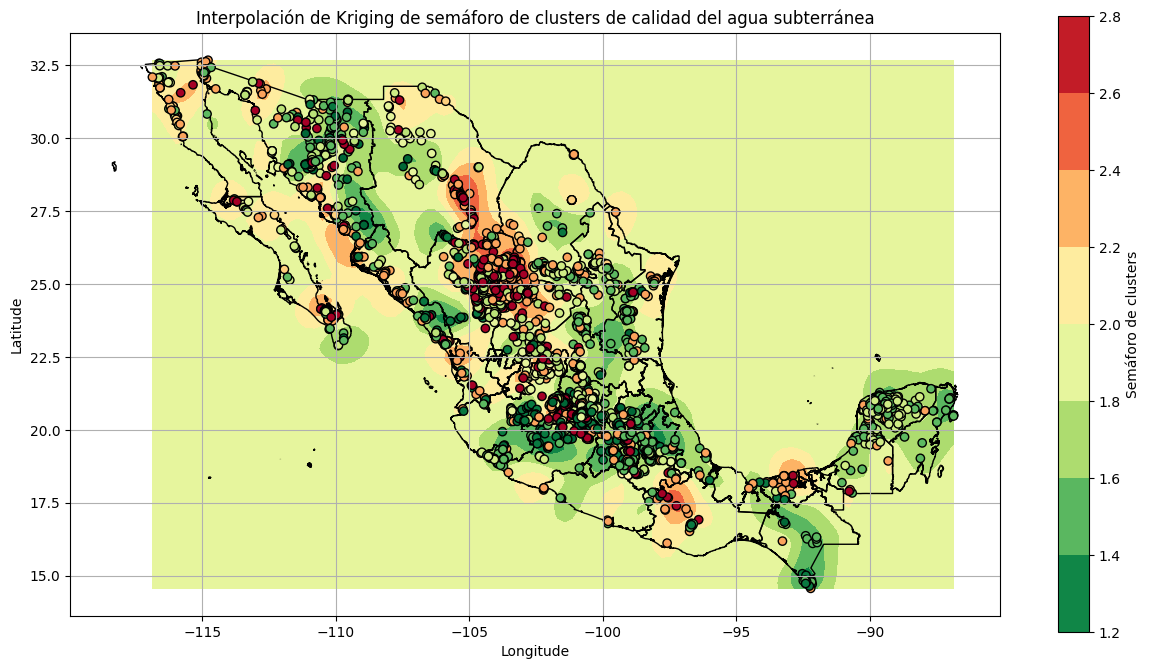

In [ ]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create a contour plot
contour = ax.contourf(grid_longitudes, grid_latitudes, z, cmap='RdYlGn_r')

# Plot the GeoPandas DataFrame
gdf.plot(ax=ax, color='none', edgecolor='black')

# Add a colorbar
fig.colorbar(contour, ax=ax, label='Semáforo de clusters')

# Plot the original data points
scatter = ax.scatter(longitudes, latitudes, c=ratings, edgecolors='k', cmap='RdYlGn_r')

# Add labels and title
ax.set_title('Interpolación de Kriging de semáforo de clusters de calidad del agua subterránea')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.grid(True)
plt.show()